In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Exploring the results of the tiny order bias test !

🔎 Overall Accuracy: 87.93%

📊 Accuracy by Rotation Position:
RotationPosition
A    86.529412
B    86.705882
C    89.058824
D    89.411765
Name: Correct, dtype: float64


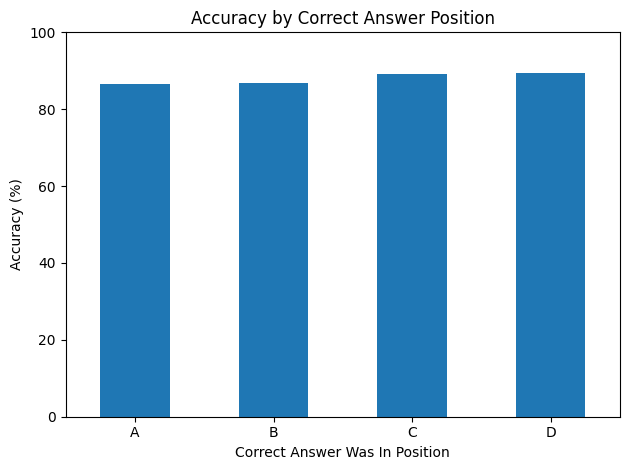

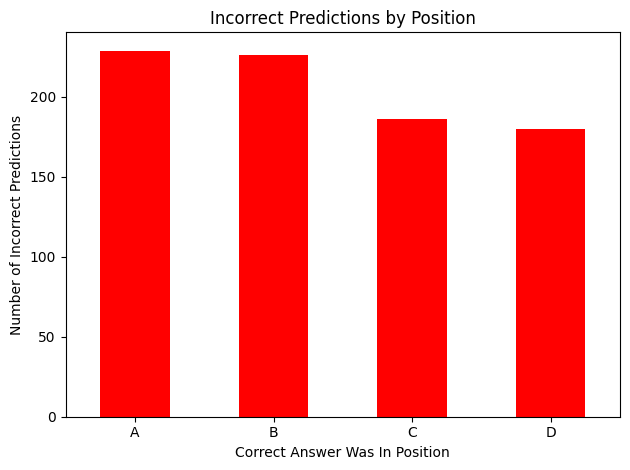


❌ Example Misclassifications:


,OriginalIndex,RotationPosition,OriginalCorrect,Predicted,RawOutput
4,1,A,A,C,"To answer this question, let's analyze each op..."
5,1,B,A,C,"To answer this question, let's analyze each op..."
6,1,C,A,B,"To answer this question, let's analyze each op..."
7,1,D,A,B,"To answer this question, let's analyze each op..."
32,8,A,D,C,"To determine the correct answer, let's analyze..."


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# === LOAD RESULTS ===
df = pd.read_csv("output/order_bias_gpt-4o_en.csv")

# Normalize columns
df["Predicted"] = df["Predicted"].str.strip().str.upper()
df["OriginalCorrect"] = df["OriginalCorrect"].str.strip().str.upper()
df["Correct"] = df["Predicted"] == df["RotationPosition"]

# === OVERALL ACCURACY ===
overall_accuracy = df["Correct"].mean() * 100
print(f"🔎 Overall Accuracy: {overall_accuracy:.2f}%")

# === ACCURACY BY ROTATION POSITION ===
by_position = df.groupby("RotationPosition")["Correct"].mean().mul(100).sort_index()
print("\n📊 Accuracy by Rotation Position:")
print(by_position)

# === PLOT POSITION BIAS ===
by_position.plot(kind="bar", title="Accuracy by Correct Answer Position", ylabel="Accuracy (%)", xlabel="Correct Answer Was In Position")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# === ERROR RATE BY POSITION (OPTIONAL) ===
error_counts = df[df["Correct"] == False]["RotationPosition"].value_counts().sort_index()
error_counts.plot(kind="bar", color="red", title="Incorrect Predictions by Position")
plt.xlabel("Correct Answer Was In Position")
plt.ylabel("Number of Incorrect Predictions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# === EXAMPLE ERRORS ===
print("\n❌ Example Misclassifications:")
display(df[df["Correct"] == False][["OriginalIndex", "RotationPosition", "OriginalCorrect", "Predicted", "RawOutput"]].head(5))


🔎 Overall Accuracy: 84.68%

📊 Accuracy by Rotation Position:
RotationPosition
A    82.529412
B    84.470588
C    85.117647
D    86.588235
Name: Correct, dtype: float64


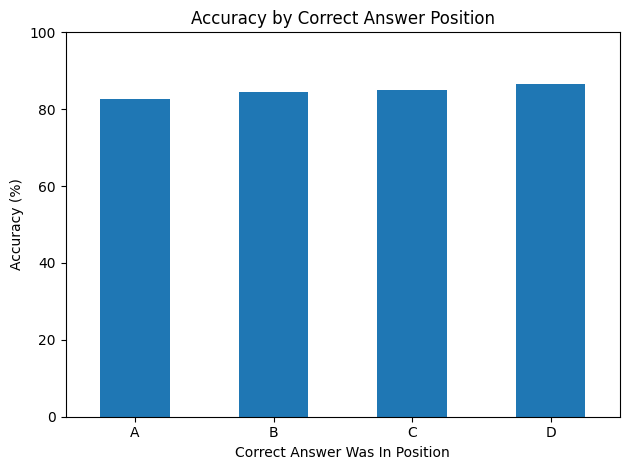

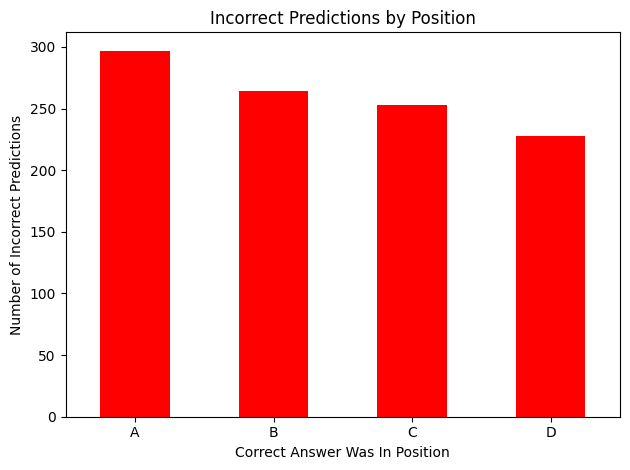


❌ Example Misclassifications:


,OriginalIndex,RotationPosition,OriginalCorrect,Predicted,RawOutput
1,0,B,B,D,"To solve this question, we need to analyze the..."
2,0,C,B,D,"To solve this question, we need to analyze the..."
4,1,A,A,C,"To answer this question, we need to analyze ea..."
5,1,B,A,C,"To answer this question, let's analyze each op..."
6,1,C,A,B,"To answer this question, let's analyze each op..."


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# === LOAD RESULTS ===
df = pd.read_csv("output/order_bias_gpt-4o_zh.csv")

# Normalize columns
df["Predicted"] = df["Predicted"].str.strip().str.upper()
df["OriginalCorrect"] = df["OriginalCorrect"].str.strip().str.upper()
df["Correct"] = df["Predicted"] == df["RotationPosition"]

# === OVERALL ACCURACY ===
overall_accuracy = df["Correct"].mean() * 100
print(f"🔎 Overall Accuracy: {overall_accuracy:.2f}%")

# === ACCURACY BY ROTATION POSITION ===
by_position = df.groupby("RotationPosition")["Correct"].mean().mul(100).sort_index()
print("\n📊 Accuracy by Rotation Position:")
print(by_position)

# === PLOT POSITION BIAS ===
by_position.plot(kind="bar", title="Accuracy by Correct Answer Position", ylabel="Accuracy (%)", xlabel="Correct Answer Was In Position")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# === ERROR RATE BY POSITION (OPTIONAL) ===
error_counts = df[df["Correct"] == False]["RotationPosition"].value_counts().sort_index()
error_counts.plot(kind="bar", color="red", title="Incorrect Predictions by Position")
plt.xlabel("Correct Answer Was In Position")
plt.ylabel("Number of Incorrect Predictions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# === EXAMPLE ERRORS ===
print("\n❌ Example Misclassifications:")
display(df[df["Correct"] == False][["OriginalIndex", "RotationPosition", "OriginalCorrect", "Predicted", "RawOutput"]].head(5))
